In [1]:
# Sample API
import flowx
import numpy
from scipy.interpolate import griddata
import matplotlib.pyplot as plt 
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 129, 129
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

Re   = 100.0
dt   = 0.001
tmax = 10.

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=10.0, dt=0.001, Re=100.0)

In [3]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

poisson_options = dict(maxiter = 2000, tol = 1e-9)
poisson_options['lu'], poisson_options['mtx'] = flowx.poisson.build_sparse(gridc, 'pres')

while scalars.variable['time'] <= scalars.variable['tmax']:
    for i in range (0,3):
    
        # Predictor Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor',i=i)

        # Divergence Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence',i=i)
    
        # Solve the pressure Poisson equation 
        scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_lu(gridc, 'pres', 'divv', 
                                                                             poisson_options)
    
        # Corrector Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector',i=i)
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.531826414716223e-10
Max, Min, U   : 2.0, -0.046133177959281686
Max, Min, V   : 0.13257486401189567, -0.13257486401189567
Max, Min, P   : 6.89289910265168, -6.565664042516045
Max, Min, DIV : 7.377431998634165e-14, -1.0724754417879012e-13


------------ Time = 0.010000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.838549266097276e-10
Max, Min, U   : 2.0, -0.12060282093146289
Max, Min, V   : 0.2837376844628919, -0.2945887115040763
Max, Min, P   : 3.9034433448501655, -3.480185365228705
Max, Min, DIV : 3.9968028886505635e-14, -3.212013988118656e-14


------------ Time = 0.02000000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0729915114019174e-10
Max, Min, U   : 2.0, -0.13279172728756022
Max, Min, V   : 0.30188501098481507, -0.3318080766569335
Max, Min, P   : 3.6408678857794703, -3.1688831210015

------------ Time = 0.23000000000000018 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.613157342947527e-11
Max, Min, U   : 2.0, -0.16405381093874954
Max, Min, V   : 0.32332822298459696, -0.4320755341687503
Max, Min, P   : 3.4403130812153493, -2.6969190783381554
Max, Min, DIV : 4.263256414560601e-14, -3.853167784839684e-14


------------ Time = 0.24000000000000019 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.010121951416805e-11
Max, Min, U   : 2.0, -0.16502755484906312
Max, Min, V   : 0.32324704208637267, -0.4336781778792734
Max, Min, P   : 3.4440570674631688, -2.6911777736788687
Max, Min, DIV : 4.088396288182139e-14, -4.2299497238218464e-14


------------ Time = 0.25000000000000017 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.245548304879821e-11
Max, Min, U   : 2.0, -0.16589781456101552
Max, Min, V   : 0.32316574965412403, -0.4351590809209923
Max, Min, P   : 3.449200506223978, -

------------ Time = 0.47000000000000036 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.846937331570102e-11
Max, Min, U   : 2.0, -0.18274213882854656
Max, Min, V   : 0.321877633652325, -0.46096265440986467
Max, Min, P   : 3.477732755358667, -2.6473114435589933
Max, Min, DIV : 4.073824610983934e-14, -4.067579606470417e-14


------------ Time = 0.48000000000000037 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.459945460785302e-11
Max, Min, U   : 2.0, -0.1834381718180274
Max, Min, V   : 0.321841686816176, -0.461719636350711
Max, Min, P   : 3.477182874763303, -2.6480676830748573
Max, Min, DIV : 4.263256414560601e-14, -4.263256414560601e-14


------------ Time = 0.4900000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.23204937959139e-11
Max, Min, U   : 2.0, -0.1840401200605405
Max, Min, V   : 0.3218071897186853, -0.4624451379362994
Max, Min, P   : 3.4764460425637727, -2.649030476

------------ Time = 0.7100000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.402158386127488e-11
Max, Min, U   : 2.0, -0.1974856899439967
Max, Min, V   : 0.32131045680511533, -0.4790747682530651
Max, Min, P   : 3.500635475887855, -2.6322324679514635
Max, Min, DIV : 3.930189507173054e-14, -4.030109579389318e-14


------------ Time = 0.7200000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.755408757455147e-11
Max, Min, U   : 2.0, -0.1980143920049363
Max, Min, V   : 0.3212962215597333, -0.47959252576626904
Max, Min, P   : 3.5006188876068496, -2.6326256462407223
Max, Min, DIV : 4.263256414560601e-14, -4.263256414560601e-14


------------ Time = 0.7300000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.67785148039476e-11
Max, Min, U   : 2.0, -0.19849683203159013
Max, Min, V   : 0.32128248347901683, -0.4801004458449559
Max, Min, P   : 3.5016148743911937, -2.63200

------------ Time = 0.9500000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.382441219030203e-11
Max, Min, U   : 2.0, -0.20889490856386966
Max, Min, V   : 0.3210727945889122, -0.49188715545303646
Max, Min, P   : 3.519135033812482, -2.622439721189556
Max, Min, DIV : 4.163336342344337e-14, -4.0217829067046296e-14


------------ Time = 0.9600000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.634219994606888e-11
Max, Min, U   : 2.0, -0.20931507072484062
Max, Min, V   : 0.32106632715102823, -0.492358644812022
Max, Min, P   : 3.5236057611449265, -2.6183065442128286
Max, Min, DIV : 3.9968028886505635e-14, -4.0967229608668276e-14


------------ Time = 0.9700000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.100375092850309e-11
Max, Min, U   : 2.0, -0.20970801709127312
Max, Min, V   : 0.3210600513616112, -0.4928189700740832
Max, Min, P   : 3.5225294168008734, -2.61

------------ Time = 1.1899999999999797 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.279262104043391e-11
Max, Min, U   : 2.0, -0.21734125512781177
Max, Min, V   : 0.32095888906473724, -0.5006924551699737
Max, Min, P   : 3.5278592621704856, -2.6211185282975227
Max, Min, DIV : 4.234633477206984e-14, -4.030109579389318e-14


------------ Time = 1.1999999999999786 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.339380223719923e-11
Max, Min, U   : 2.0, -0.21766266500439993
Max, Min, V   : 0.32095555639143947, -0.5009688165554343
Max, Min, P   : 3.530859767413379, -2.618395312966539
Max, Min, DIV : 4.263256414560601e-14, -4.3298697960381105e-14


------------ Time = 1.2099999999999775 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.126689698180436e-11
Max, Min, U   : 2.0, -0.2179761987162066
Max, Min, V   : 0.3209523058403786, -0.501274316585742
Max, Min, P   : 3.5327367748690643, -2.61679

------------ Time = 1.4299999999999533 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.195041137202864e-11
Max, Min, U   : 2.0, -0.22356187019477994
Max, Min, V   : 0.32089697402964684, -0.5078730746543458
Max, Min, P   : 3.537116417776165, -2.617895448938566
Max, Min, DIV : 4.163336342344337e-14, -4.063416270128073e-14


------------ Time = 1.4399999999999522 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.429833260322816e-11
Max, Min, U   : 2.0, -0.22379287400069547
Max, Min, V   : 0.32089502621726035, -0.5081142842428352
Max, Min, P   : 3.543200951994698, -2.6120361711434064
Max, Min, DIV : 3.9968028886505635e-14, -4.2299497238218464e-14


------------ Time = 1.449999999999951 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.143261270781453e-11
Max, Min, U   : 2.0, -0.22401261964700225
Max, Min, V   : 0.3208931159864246, -0.5083512959445622
Max, Min, P   : 3.5307217719297537, -2.6247

------------ Time = 1.6699999999999269 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.908662921626252e-11
Max, Min, U   : 2.0, -0.22796417398432153
Max, Min, V   : 0.3208585699016654, -0.5126704328971526
Max, Min, P   : 3.5438760075898808, -2.6160490155129588
Max, Min, DIV : 4.196643033083092e-14, -4.263256414560601e-14


------------ Time = 1.6799999999999258 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.937165154947928e-11
Max, Min, U   : 2.0, -0.22809984356853688
Max, Min, V   : 0.3208572636511799, -0.5128325093396473
Max, Min, P   : 3.545222202473373, -2.6148869708860807
Max, Min, DIV : 4.296563105299356e-14, -4.196643033083092e-14


------------ Time = 1.6899999999999247 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.992738931879934e-11
Max, Min, U   : 2.0, -0.2282795991345044
Max, Min, V   : 0.3208559749375816, -0.5129920824581895
Max, Min, P   : 3.5392073834806554, -2.621084

------------ Time = 1.9099999999999004 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.319554452748226e-11
Max, Min, U   : 2.0, -0.2311420098846728
Max, Min, V   : 0.32083109104696833, -0.5163355193803331
Max, Min, P   : 3.5530574861951956, -2.610902059933462
Max, Min, DIV : 4.296563105299356e-14, -4.163336342344337e-14


------------ Time = 1.9199999999998993 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.84302493983747e-11
Max, Min, U   : 2.0, -0.23127287015713816
Max, Min, V   : 0.32083008083169723, -0.5164868068239546
Max, Min, P   : 3.548915289947495, -2.615196276227364
Max, Min, DIV : 4.184153024056059e-14, -3.8968828164342995e-14


------------ Time = 1.9299999999998982 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.221530995581147e-11
Max, Min, U   : 2.0, -0.2313984850526338
Max, Min, V   : 0.3208290784710526, -0.5166360217020657
Max, Min, P   : 3.5515852209103347, -2.6126771

------------ Time = 2.1499999999998742 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.611908663372655e-11
Max, Min, U   : 2.0, -0.23346033054215273
Max, Min, V   : 0.3208085337949371, -0.5194612397785157
Max, Min, P   : 3.5547930623874806, -2.6125118741513056
Max, Min, DIV : 3.930189507173054e-14, -4.163336342344337e-14


------------ Time = 2.159999999999873 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.331338615281805e-11
Max, Min, U   : 2.0, -0.2335252540039321
Max, Min, V   : 0.3208076502674481, -0.5195715279349734
Max, Min, P   : 3.5537687724937057, -2.6136628434311824
Max, Min, DIV : 4.171663015029026e-14, -4.163336342344337e-14


------------ Time = 2.169999999999872 ---------------
Number of poisson iterations    : None
Final poisson residual : 7.769135688403851e-11
Max, Min, U   : 2.0, -0.23359893806835838
Max, Min, V   : 0.32080676980847406, -0.519680442699921
Max, Min, P   : 3.5532143106729586, -2.6143430

------------ Time = 2.389999999999848 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.985067075922154e-11
Max, Min, U   : 2.0, -0.2352050267991078
Max, Min, V   : 0.32078794606198024, -0.5218309209124322
Max, Min, P   : 3.552584902363054, -2.6175187354998015
Max, Min, DIV : 4.0967229608668276e-14, -4.296563105299356e-14


------------ Time = 2.3999999999998467 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.436858072305389e-11
Max, Min, U   : 2.0, -0.23526422250961063
Max, Min, V   : 0.32078710677760824, -0.521926098355375
Max, Min, P   : 3.554726342269943, -2.615483731706384
Max, Min, DIV : 4.221623051137158e-14, -4.163336342344337e-14


------------ Time = 2.4099999999998456 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.086618003145223e-11
Max, Min, U   : 2.0, -0.23532094300304868
Max, Min, V   : 0.3207862683257128, -0.522020202607764
Max, Min, P   : 3.554022516591131, -2.616293241

------------ Time = 2.6299999999998214 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.548425989429497e-11
Max, Min, U   : 2.0, -0.23643108861287535
Max, Min, V   : 0.320767939975024, -0.5238482325697272
Max, Min, P   : 3.5544122572520496, -2.618050827630955
Max, Min, DIV : 4.296563105299356e-14, -4.296563105299356e-14


------------ Time = 2.6399999999998203 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.394301498207538e-11
Max, Min, U   : 2.0, -0.23646856924567397
Max, Min, V   : 0.3207671090770767, -0.5239215045565142
Max, Min, P   : 3.5510214356420384, -2.621531713243541
Max, Min, DIV : 4.263256414560601e-14, -4.163336342344337e-14


------------ Time = 2.649999999999819 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.320412284388686e-11
Max, Min, U   : 2.0, -0.2365137227663952
Max, Min, V   : 0.3207662781819594, -0.523994015449483
Max, Min, P   : 3.5559851321295564, -2.6166574685

------------ Time = 2.859999999999796 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.745705888858131e-11
Max, Min, U   : 2.0, -0.23735939909447656
Max, Min, V   : 0.32074881447714376, -0.5253579060852318
Max, Min, P   : 3.5621031191754247, -2.6122851160583522
Max, Min, DIV : 4.796163466380676e-14, -4.529709940470639e-14


------------ Time = 2.869999999999795 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.042905366826369e-11
Max, Min, U   : 2.0, -0.2373882075583146
Max, Min, V   : 0.32074798193990406, -0.5254160221797206
Max, Min, P   : 3.556302365531066, -2.6181630526227826
Max, Min, DIV : 4.101927131294758e-14, -4.1799896877137144e-14


------------ Time = 2.879999999999794 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.219369206525942e-11
Max, Min, U   : 2.0, -0.23743077345650238
Max, Min, V   : 0.3207471493385076, -0.5254735776197611
Max, Min, P   : 3.5621758596458277, -2.612366

------------ Time = 3.0999999999997696 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.878269196157811e-11
Max, Min, U   : 2.0, -0.23816175831925127
Max, Min, V   : 0.3207288365416265, -0.5266112750138796
Max, Min, P   : 3.56397292952189, -2.6121353912638674
Max, Min, DIV : 3.9968028886505635e-14, -4.030109579389318e-14


------------ Time = 3.1099999999997685 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.338849062513798e-11
Max, Min, U   : 2.0, -0.2381972882195738
Max, Min, V   : 0.32072800555955744, -0.526657696669919
Max, Min, P   : 3.562041531024724, -2.614132829735491
Max, Min, DIV : 4.196643033083092e-14, -4.063416270128073e-14


------------ Time = 3.1199999999997674 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.45249870696278e-11
Max, Min, U   : 2.0, -0.23823183575914736
Max, Min, V   : 0.3207271748261039, -0.5267037015968132
Max, Min, P   : 3.5595701394016364, -2.616669840

------------ Time = 3.339999999999743 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.12503047993242e-11
Max, Min, U   : 2.0, -0.23877525489664267
Max, Min, V   : 0.3207089991846386, -0.5276196281835506
Max, Min, P   : 3.5665320100502527, -2.611051246625376
Max, Min, DIV : 4.0467629247586956e-14, -3.913536161803677e-14


------------ Time = 3.349999999999742 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.557824529387112e-11
Max, Min, U   : 2.0, -0.23879142206796736
Max, Min, V   : 0.32070817937441254, -0.527657273395884
Max, Min, P   : 3.5620300716481212, -2.615609945815514
Max, Min, DIV : 4.263256414560601e-14, -4.077987947326278e-14


------------ Time = 3.359999999999741 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.698187619552198e-11
Max, Min, U   : 2.0, -0.23881508231200063
Max, Min, V   : 0.32070736027640107, -0.5276946023434329
Max, Min, P   : 3.5651742242805433, -2.61252220

------------ Time = 3.5799999999997167 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.975495473575449e-11
Max, Min, U   : 2.0, -0.2392891696779981
Max, Min, V   : 0.3206895607691059, -0.528442386772685
Max, Min, P   : 3.566228350149822, -2.6126249439662934
Max, Min, DIV : 4.188316360398403e-14, -4.529709940470639e-14


------------ Time = 3.5899999999997156 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.740467311489405e-11
Max, Min, U   : 2.0, -0.23930426456901108
Max, Min, V   : 0.3206887635342651, -0.5284733121429371
Max, Min, P   : 3.5684083824224726, -2.610493885130412
Max, Min, DIV : 4.263256414560601e-14, -4.1425196606326153e-14


------------ Time = 3.5999999999997145 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.893099069589486e-11
Max, Min, U   : 2.0, -0.2393188729304073
Max, Min, V   : 0.3206879674808909, -0.5285039928756141
Max, Min, P   : 3.5688357798510726, -2.61011516

------------ Time = 3.8199999999996903 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.066720160273531e-11
Max, Min, U   : 2.0, -0.23976973396087967
Max, Min, V   : 0.32067078880967603, -0.5291218261845401
Max, Min, P   : 3.561143413499239, -2.618807397886053
Max, Min, DIV : 4.163336342344337e-14, -4.030109579389318e-14


------------ Time = 3.829999999999689 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.349955308989042e-11
Max, Min, U   : 2.0, -0.2397863291178096
Max, Min, V   : 0.3206700246930987, -0.529147511394133
Max, Min, P   : 3.5636513973720807, -2.6163418068744453
Max, Min, DIV : 4.39648317751562e-14, -4.263256414560601e-14


------------ Time = 3.839999999999688 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.338844356698604e-11
Max, Min, U   : 2.0, -0.23980253860468892
Max, Min, V   : 0.3206692621558819, -0.5291730040632288
Max, Min, P   : 3.56697179070245, -2.613063554949

------------ Time = 4.049999999999687 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.649042128528426e-11
Max, Min, U   : 2.0, -0.24008929128996367
Max, Min, V   : 0.32065363762420107, -0.529764077840451
Max, Min, P   : 3.562112334558413, -2.6187527703620854
Max, Min, DIV : 5.3290705182007514e-14, -4.1300296516055823e-14


------------ Time = 4.0599999999996905 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.249801020532328e-11
Max, Min, U   : 2.0, -0.24010689873280233
Max, Min, V   : 0.3206529131540854, -0.529791789835211
Max, Min, P   : 3.5623232152799855, -2.618578903415454
Max, Min, DIV : 4.1300296516055823e-14, -4.296563105299356e-14


------------ Time = 4.069999999999694 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.398356053811346e-11
Max, Min, U   : 2.0, -0.2401241873631089
Max, Min, V   : 0.3206521905478108, -0.5298193042325132
Max, Min, P   : 3.5645216061885066, -2.6164173

------------ Time = 4.279999999999764 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.354272197405107e-11
Max, Min, U   : 2.0, -0.24042147993884286
Max, Min, V   : 0.32063746257517695, -0.5303544218833279
Max, Min, P   : 3.5628197488343236, -2.6188444597906306
Max, Min, DIV : 4.296563105299356e-14, -4.463096558993129e-14


------------ Time = 4.289999999999767 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.496877998340698e-11
Max, Min, U   : 2.0, -0.24043284885488736
Max, Min, V   : 0.3206367831962387, -0.5303780027838668
Max, Min, P   : 3.569803527759254, -2.611893067203678
Max, Min, DIV : 4.296563105299356e-14, -5.3290705182007514e-14


------------ Time = 4.299999999999771 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.393771689045784e-11
Max, Min, U   : 2.0, -0.24044399296618915
Max, Min, V   : 0.32063610586646485, -0.5304014220651354
Max, Min, P   : 3.5657865254050627, -2.615942

------------ Time = 4.519999999999844 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.768313236694341e-11
Max, Min, U   : 2.0, -0.24067997695193222
Max, Min, V   : 0.3206217332644372, -0.5308783677813029
Max, Min, P   : 3.5678665452682394, -2.6145258537410605
Max, Min, DIV : 4.2299497238218464e-14, -4.1300296516055823e-14


------------ Time = 4.5299999999998475 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.541256002510621e-11
Max, Min, U   : 2.0, -0.2406939262940358
Max, Min, V   : 0.32062110436621144, -0.5308984182581892
Max, Min, P   : 3.569710828114761, -2.612709797722806
Max, Min, DIV : 4.163336342344337e-14, -4.163336342344337e-14


------------ Time = 4.539999999999851 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.566560358673176e-11
Max, Min, U   : 2.0, -0.24070767876551305
Max, Min, V   : 0.32062047761457396, -0.5309183361314243
Max, Min, P   : 3.57134289309084, -2.6111057

------------ Time = 4.759999999999924 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.859959067386061e-11
Max, Min, U   : 2.0, -0.24096545690219742
Max, Min, V   : 0.3206072351317808, -0.531325011753463
Max, Min, P   : 3.5749964618954375, -2.6080310924023697
Max, Min, DIV : 4.163336342344337e-14, -4.296563105299356e-14


------------ Time = 4.769999999999928 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.868972000424877e-11
Max, Min, U   : 2.0, -0.24097534888329514
Max, Min, V   : 0.32060665808263916, -0.5313421511303233
Max, Min, P   : 3.5723855802809443, -2.6106666146887147
Max, Min, DIV : 4.296563105299356e-14, -4.0967229608668276e-14


------------ Time = 4.779999999999931 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.487359808846445e-11
Max, Min, U   : 2.0, -0.24098509891028236
Max, Min, V   : 0.3206060831964378, -0.5313591805618981
Max, Min, P   : 3.565894455994584, -2.6171822

------------ Time = 5.000000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.623152697376542e-11
Max, Min, U   : 2.0, -0.24116730895820748
Max, Min, V   : 0.32059398023902413, -0.5317076163932992
Max, Min, P   : 3.569808985544061, -2.6137733749903123
Max, Min, DIV : 4.163336342344337e-14, -4.263256414560601e-14


------------ Time = 5.010000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.245971840425662e-11
Max, Min, U   : 2.0, -0.24117427486426393
Max, Min, V   : 0.3205934546796585, -0.5317223317241783
Max, Min, P   : 3.5721362153968337, -2.6114676828815693
Max, Min, DIV : 4.296563105299356e-14, -4.39648317751562e-14


------------ Time = 5.020000000000011 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.469064288089313e-11
Max, Min, U   : 2.0, -0.2411811383883952
Max, Min, V   : 0.32059293123747223, -0.5317369550735124
Max, Min, P   : 3.5669208788854676, -2.61670443

------------ Time = 5.240000000000085 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.924968668245915e-11
Max, Min, U   : 2.0, -0.24138226677495922
Max, Min, V   : 0.32058194436582554, -0.5320366829509382
Max, Min, P   : 3.576486294062943, -2.6075812489883736
Max, Min, DIV : 4.296563105299356e-14, -4.061594810478297e-14


------------ Time = 5.250000000000088 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.145147854605724e-11
Max, Min, U   : 2.0, -0.24139125848190005
Max, Min, V   : 0.32058146865512066, -0.5320493628837798
Max, Min, P   : 3.566997856304357, -2.6170885315297663
Max, Min, DIV : 4.196643033083092e-14, -4.296563105299356e-14


------------ Time = 5.260000000000091 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.514547583916614e-11
Max, Min, U   : 2.0, -0.2414001521079055
Max, Min, V   : 0.3205809949715228, -0.5320619652749415
Max, Min, P   : 3.5682074909929016, -2.61589763

------------ Time = 5.480000000000165 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.953961829403303e-11
Max, Min, U   : 2.0, -0.24157319016991302
Max, Min, V   : 0.32057107724348616, -0.5323206430166167
Max, Min, P   : 3.5716993566745843, -2.6127928703370453
Max, Min, DIV : 4.296563105299356e-14, -5.3290705182007514e-14


------------ Time = 5.490000000000168 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.264791318012923e-11
Max, Min, U   : 2.0, -0.24158011949493108
Max, Min, V   : 0.3205706488577875, -0.5323316017903956
Max, Min, P   : 3.570658143317538, -2.613850585416773
Max, Min, DIV : 3.951006188884776e-14, -4.200806369425436e-14


------------ Time = 5.500000000000171 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.42028683559511e-11
Max, Min, U   : 2.0, -0.24158697483877278
Max, Min, V   : 0.32057022238003646, -0.5323424947746038
Max, Min, P   : 3.581964717706403, -2.60256042

------------ Time = 5.720000000000245 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.864132872967886e-11
Max, Min, U   : 2.0, -0.24172070146406727
Max, Min, V   : 0.32056131137230315, -0.5325663518266306
Max, Min, P   : 3.5663054451019325, -2.618558775366896
Max, Min, DIV : 3.980149543281186e-14, -4.030109579389318e-14


------------ Time = 5.730000000000248 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.49493636093424e-11
Max, Min, U   : 2.0, -0.24172607156535636
Max, Min, V   : 0.3205609272362813, -0.5325758465205365
Max, Min, P   : 3.571322880089871, -2.61355579927673
Max, Min, DIV : 4.163336342344337e-14, -4.196643033083092e-14


------------ Time = 5.740000000000252 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.0095735306611046e-10
Max, Min, U   : 2.0, -0.24173138558049223
Max, Min, V   : 0.32056054487216495, -0.532585285094985
Max, Min, P   : 3.5675863543956567, -2.6173067046

------------ Time = 5.950000000000322 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.752723365554925e-11
Max, Min, U   : 2.0, -0.241831087570433
Max, Min, V   : 0.3205529140179856, -0.5327711536675771
Max, Min, P   : 3.57316285601331, -2.6120146376062445
Max, Min, DIV : 4.296563105299356e-14, -4.3298697960381105e-14


------------ Time = 5.960000000000325 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.308159095710237e-11
Max, Min, U   : 2.0, -0.2418353160974873
Max, Min, V   : 0.3205525691291632, -0.5327794451731542
Max, Min, P   : 3.5786666184845615, -2.606523619670097
Max, Min, DIV : 4.0967229608668276e-14, -4.163336342344337e-14


------------ Time = 5.970000000000328 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.819352271826952e-11
Max, Min, U   : 2.0, -0.24183950140770608
Max, Min, V   : 0.3205522258746525, -0.5327876882860156
Max, Min, P   : 3.5778036668157673, -2.60739924623

------------ Time = 6.190000000000402 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.609122393027081e-11
Max, Min, U   : 2.0, -0.24195365178240757
Max, Min, V   : 0.3205450755336068, -0.5329573910520429
Max, Min, P   : 3.569689470506376, -2.615775433370893
Max, Min, DIV : 3.930189507173054e-14, -4.163336342344337e-14


------------ Time = 6.200000000000405 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.587034485698397e-11
Max, Min, U   : 2.0, -0.24195967450072003
Max, Min, V   : 0.32054476820265404, -0.532964601426947
Max, Min, P   : 3.5774795113807065, -2.6079965683299426
Max, Min, DIV : 4.296563105299356e-14, -4.3298697960381105e-14


------------ Time = 6.2100000000004085 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.916396334334906e-11
Max, Min, U   : 2.0, -0.2419656491783596
Max, Min, V   : 0.3205444623614595, -0.5329717701869843
Max, Min, P   : 3.5713048371805782, -2.61418235

------------ Time = 6.430000000000482 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.299489546970396e-11
Max, Min, U   : 2.0, -0.24208579462395077
Max, Min, V   : 0.320538098763898, -0.5331194575108325
Max, Min, P   : 3.576401262685417, -2.609315707303683
Max, Min, DIV : 4.08006961549745e-14, -4.0967229608668276e-14


------------ Time = 6.440000000000485 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.912839012146153e-11
Max, Min, U   : 2.0, -0.24209077872659712
Max, Min, V   : 0.32053782555588356, -0.5331257367677918
Max, Min, P   : 3.5709060729242337, -2.614820699858233
Max, Min, DIV : 4.296563105299356e-14, -4.1300296516055823e-14


------------ Time = 6.450000000000489 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.631433512874771e-11
Max, Min, U   : 2.0, -0.24209572431446147
Max, Min, V   : 0.32053755369672654, -0.5331319801256971
Max, Min, P   : 3.575221195039978, -2.610515327

------------ Time = 6.670000000000562 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.204606828907991e-11
Max, Min, U   : 2.0, -0.24219544922068756
Max, Min, V   : 0.3205319025710264, -0.5332606778206049
Max, Min, P   : 3.56205194350579, -2.62388614532122
Max, Min, DIV : 4.263256414560601e-14, -4.2299497238218464e-14


------------ Time = 6.6800000000005655 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.717003244462892e-11
Max, Min, U   : 2.0, -0.24219959793946366
Max, Min, V   : 0.3205316601770831, -0.5332661528308803
Max, Min, P   : 3.568938898501351, -2.61700779042512
Max, Min, DIV : 4.529709940470639e-14, -4.213296378452469e-14


------------ Time = 6.690000000000569 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.498031192329676e-11
Max, Min, U   : 2.0, -0.2422037155631676
Max, Min, V   : 0.32053141899784005, -0.5332715967913091
Max, Min, P   : 3.578322957287592, -2.6076322849907

------------ Time = 6.900000000000639 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.290731769102256e-11
Max, Min, U   : 2.0, -0.24228346026594572
Max, Min, V   : 0.3205266253808209, -0.5333790656329563
Max, Min, P   : 3.5759893859170684, -2.6101351192219604
Max, Min, DIV : 3.9968028886505635e-14, -4.529709940470639e-14


------------ Time = 6.910000000000642 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.609259375196622e-11
Max, Min, U   : 2.0, -0.24228695790162438
Max, Min, V   : 0.3205264095831633, -0.5333838713686904
Max, Min, P   : 3.572462575724882, -2.6136695166485384
Max, Min, DIV : 4.3298697960381105e-14, -4.296563105299356e-14


------------ Time = 6.920000000000646 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.964836324743688e-11
Max, Min, U   : 2.0, -0.24229043004641534
Max, Min, V   : 0.3205261948796908, -0.5333886500297709
Max, Min, P   : 3.5690669848578747, -2.617072

------------ Time = 7.140000000000719 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.275307513830304e-11
Max, Min, U   : 2.0, -0.24236078341646855
Max, Min, V   : 0.32052173819940893, -0.5334872432798147
Max, Min, P   : 3.5680946337041863, -2.6182010349637714
Max, Min, DIV : 4.296563105299356e-14, -4.296563105299356e-14


------------ Time = 7.1500000000007224 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.383587585759749e-11
Max, Min, U   : 2.0, -0.24236372480577928
Max, Min, V   : 0.32052154730383897, -0.5334914412946696
Max, Min, P   : 3.5782177656372447, -2.608084561006197
Max, Min, DIV : 4.296563105299356e-14, -4.163336342344337e-14


------------ Time = 7.160000000000726 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.708314804997316e-11
Max, Min, U   : 2.0, -0.24236664534600016
Max, Min, V   : 0.32052135738603665, -0.533495615798392
Max, Min, P   : 3.5762596718823247, -2.61004

------------ Time = 7.370000000000796 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.459656260595577e-11
Max, Min, U   : 2.0, -0.24242344969066462
Max, Min, V   : 0.320517586916536, -0.5335780845015873
Max, Min, P   : 3.579881872076021, -2.6065581275944747
Max, Min, DIV : 4.221623051137158e-14, -4.263256414560601e-14


------------ Time = 7.380000000000799 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.362696891433124e-11
Max, Min, U   : 2.0, -0.24242595210145126
Max, Min, V   : 0.32051741736689476, -0.5335817749479869
Max, Min, P   : 3.5755134546008374, -2.6109324199316295
Max, Min, DIV : 4.0967229608668276e-14, -4.296563105299356e-14


------------ Time = 7.390000000000803 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.873402953208567e-11
Max, Min, U   : 2.0, -0.24242843721582202
Max, Min, V   : 0.32051724869271697, -0.5335854448267175
Max, Min, P   : 3.576493603821782, -2.6099581

------------ Time = 7.600000000000873 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.846259573192241e-11
Max, Min, U   : 2.0, -0.24247686230997076
Max, Min, V   : 0.32051390140372, -0.5336579649726203
Max, Min, P   : 3.567260191821013, -2.619307166144546
Max, Min, DIV : 4.063416270128073e-14, -4.296563105299356e-14


------------ Time = 7.610000000000876 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.027516946509545e-11
Max, Min, U   : 2.0, -0.24247899961995747
Max, Min, V   : 0.3205137509463567, -0.5336612111297613
Max, Min, P   : 3.5718483486551227, -2.6147241934668157
Max, Min, DIV : 4.3298697960381105e-14, -4.3298697960381105e-14


------------ Time = 7.620000000000879 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.831577225386037e-11
Max, Min, U   : 2.0, -0.2424811225027905
Max, Min, V   : 0.32051360127114714, -0.5336644392717581
Max, Min, P   : 3.5748071990914045, -2.611770499

------------ Time = 7.840000000000953 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.830007324901258e-11
Max, Min, U   : 2.0, -0.24254244090379531
Max, Min, V   : 0.3205104986674355, -0.5337311026387984
Max, Min, P   : 3.5748223272408546, -2.61186199296789
Max, Min, DIV : 4.296563105299356e-14, -4.030109579389318e-14


------------ Time = 7.850000000000956 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.912487225057163e-11
Max, Min, U   : 2.0, -0.24254523721053067
Max, Min, V   : 0.3205103659500153, -0.5337339436482615
Max, Min, P   : 3.5732759271928125, -2.6134129430904163
Max, Min, DIV : 4.263256414560601e-14, -4.296563105299356e-14


------------ Time = 7.8600000000009596 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.480465969683812e-11
Max, Min, U   : 2.0, -0.24254801617639646
Max, Min, V   : 0.3205102339266309, -0.5337367689510764
Max, Min, P   : 3.574706322732653, -2.611987072

------------ Time = 8.070000000000967 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.011356328057454e-11
Max, Min, U   : 2.0, -0.24260257263947152
Max, Min, V   : 0.3205076157410604, -0.5337926253252216
Max, Min, P   : 3.5800518472508718, -2.606731116035585
Max, Min, DIV : 4.296563105299356e-14, -4.296563105299356e-14


------------ Time = 8.080000000000961 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.566711628964054e-11
Max, Min, U   : 2.0, -0.24260499878905156
Max, Min, V   : 0.3205074981345687, -0.5337951267189155
Max, Min, P   : 3.5760910004914495, -2.610695978275056
Max, Min, DIV : 4.0197012385334574e-14, -4.263256414560601e-14


------------ Time = 8.090000000000956 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.44711801677989e-11
Max, Min, U   : 2.0, -0.24260741012554207
Max, Min, V   : 0.32050738114604693, -0.5337976143272051
Max, Min, P   : 3.5712222573640346, -2.61556871

------------ Time = 8.30000000000084 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.903448674858236e-11
Max, Min, U   : 2.0, -0.24265479665490716
Max, Min, V   : 0.320505061721574, -0.5338468033537753
Max, Min, P   : 3.569172298353716, -2.6176977197735605
Max, Min, DIV : 4.163336342344337e-14, -4.163336342344337e-14


------------ Time = 8.310000000000834 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.19882430547012e-11
Max, Min, U   : 2.0, -0.24265690606592455
Max, Min, V   : 0.3205049575616902, -0.5338490065599246
Max, Min, P   : 3.572984308426632, -2.61388925352238
Max, Min, DIV : 4.163336342344337e-14, -4.1300296516055823e-14


------------ Time = 8.320000000000828 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.065605811136803e-11
Max, Min, U   : 2.0, -0.242659002777489
Max, Min, V   : 0.3205048539513551, -0.5338511976572728
Max, Min, P   : 3.576324112895896, -2.610552973677349


------------ Time = 8.540000000000706 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.577710513849963e-11
Max, Min, U   : 2.0, -0.24270208052445705
Max, Min, V   : 0.32050270801063063, -0.5338964715610599
Max, Min, P   : 3.5745850459670634, -2.6123649303937175
Max, Min, DIV : 4.1924796967407474e-14, -4.529709940470639e-14


------------ Time = 8.5500000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.412004990908401e-11
Max, Min, U   : 2.0, -0.24270390704647388
Max, Min, V   : 0.320502616290614, -0.5338984021156009
Max, Min, P   : 3.5704410862531413, -2.6165120008352742
Max, Min, DIV : 4.296563105299356e-14, -4.296563105299356e-14


------------ Time = 8.560000000000695 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.825251940871053e-11
Max, Min, U   : 2.0, -0.24270572271591653
Max, Min, V   : 0.3205025250562644, -0.5339003220860606
Max, Min, P   : 3.573452498989478, -2.613503681

------------ Time = 8.770000000000579 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.463925460403298e-11
Max, Min, U   : 2.0, -0.2427414645051858
Max, Min, V   : 0.3205007169932882, -0.5339382981348123
Max, Min, P   : 3.576030622527279, -2.6109867958744903
Max, Min, DIV : 4.1300296516055823e-14, -4.296563105299356e-14


------------ Time = 8.780000000000573 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.209671629051886e-11
Max, Min, U   : 2.0, -0.2427430582723075
Max, Min, V   : 0.3205006358308741, -0.5339399996043461
Max, Min, P   : 3.5735622133467677, -2.6134579505737228
Max, Min, DIV : 4.2799097599299785e-14, -4.2049697057677804e-14


------------ Time = 8.790000000000568 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.970878226451577e-11
Max, Min, U   : 2.0, -0.24274464267593301
Max, Min, V   : 0.3205005550994917, -0.5339416917648263
Max, Min, P   : 3.571694169783826, -2.61532872

------------ Time = 9.010000000000446 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.212791320695e-11
Max, Min, U   : 2.0, -0.24277724629027564
Max, Min, V   : 0.32049888364437884, -0.533976665666434
Max, Min, P   : 3.569578191589086, -2.617501175022457
Max, Min, DIV : 4.159173006001993e-14, -4.163336342344337e-14


------------ Time = 9.02000000000044 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.268024242297666e-11
Max, Min, U   : 2.0, -0.24277863088397342
Max, Min, V   : 0.320498812230695, -0.5339781574061767
Max, Min, P   : 3.5757677205744236, -2.6113140561760124
Max, Min, DIV : 4.263256414560601e-14, -4.1300296516055823e-14


------------ Time = 9.030000000000435 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.212498907225561e-11
Max, Min, U   : 2.0, -0.2427800074277884
Max, Min, V   : 0.32049874119726524, -0.5339796409993769
Max, Min, P   : 3.5740528999688026, -2.6130312738739

------------ Time = 9.250000000000313 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.109732976506128e-11
Max, Min, U   : 2.0, -0.24280835254832092
Max, Min, V   : 0.32049727074840156, -0.5340103075271501
Max, Min, P   : 3.5789263068418395, -2.6082074414418073
Max, Min, DIV : 4.263256414560601e-14, -4.296563105299356e-14


------------ Time = 9.260000000000307 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.685472381435511e-11
Max, Min, U   : 2.0, -0.2428095570912363
Max, Min, V   : 0.320497207932082, -0.5340116156851756
Max, Min, P   : 3.5765722722921236, -2.6105635917822636
Max, Min, DIV : 4.263256414560601e-14, -4.063416270128073e-14


------------ Time = 9.270000000000302 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.952977102856992e-11
Max, Min, U   : 2.0, -0.24281075469559948
Max, Min, V   : 0.32049714545098457, -0.5340129167105262
Max, Min, P   : 3.568009533697154, -2.61912843

------------ Time = 9.480000000000185 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.925263964638466e-11
Max, Min, U   : 2.0, -0.24283437430683705
Max, Min, V   : 0.3204959077438767, -0.5340386583136039
Max, Min, P   : 3.5738926321041062, -2.6132869893554123
Max, Min, DIV : 4.296563105299356e-14, -4.163336342344337e-14


------------ Time = 9.49000000000018 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.368894905185294e-11
Max, Min, U   : 2.0, -0.24283542951568934
Max, Min, V   : 0.32049585220766896, -0.5340398119870738
Max, Min, P   : 3.5714904786153294, -2.615691010392871
Max, Min, DIV : 4.0967229608668276e-14, -4.1300296516055823e-14


------------ Time = 9.500000000000174 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.567335128689506e-11
Max, Min, U   : 2.0, -0.24283647869366645
Max, Min, V   : 0.3204957969683731, -0.5340409593783992
Max, Min, P   : 3.576846785944095, -2.6103365

------------ Time = 9.720000000000052 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.36628172508096e-11
Max, Min, U   : 2.0, -0.24285810595569715
Max, Min, V   : 0.32049465373672154, -0.5340646804951701
Max, Min, P   : 3.583571303767567, -2.603650457589627
Max, Min, DIV : 4.063416270128073e-14, -4.2060105398533665e-14


------------ Time = 9.730000000000047 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.738490004391641e-11
Max, Min, U   : 2.0, -0.24285902599690312
Max, Min, V   : 0.3204946049100215, -0.5340656925488142
Max, Min, P   : 3.569242468986587, -2.617980931925364
Max, Min, DIV : 5.3290705182007514e-14, -4.263256414560601e-14


------------ Time = 9.740000000000041 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.522094976269604e-11
Max, Min, U   : 2.0, -0.24285994081752213
Max, Min, V   : 0.3204945563447859, -0.5340666990979308
Max, Min, P   : 3.5797574679709223, -2.607467563

------------ Time = 9.949999999999925 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.032823657212113e-11
Max, Min, U   : 2.0, -0.24287799939997773
Max, Min, V   : 0.3204935944840216, -0.5340866170815582
Max, Min, P   : 3.5743366441190934, -2.612920665793237
Max, Min, DIV : 4.263256414560601e-14, -4.196643033083092e-14


------------ Time = 9.95999999999992 ---------------
Number of poisson iterations    : None
Final poisson residual : 9.317773884034126e-11
Max, Min, U   : 2.0, -0.24287880688661895
Max, Min, V   : 0.3204935513331753, -0.5340875098779544
Max, Min, P   : 3.5699810044436635, -2.617277752727246
Max, Min, DIV : 4.39648317751562e-14, -4.1300296516055823e-14


------------ Time = 9.969999999999914 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.651581154176513e-11
Max, Min, U   : 2.0, -0.2428796098190573
Max, Min, V   : 0.3204935084137053, -0.5340883978231312
Max, Min, P   : 3.568908197051551, -2.618351999549

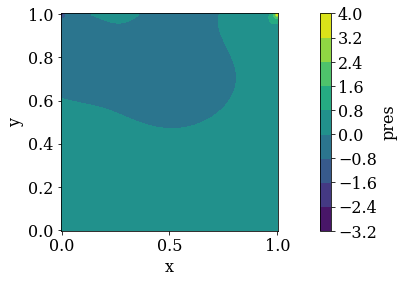

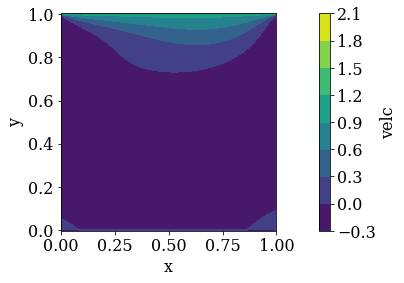

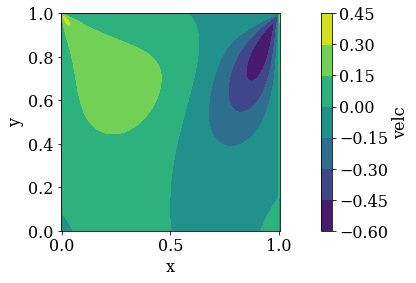

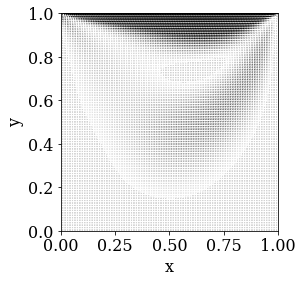

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx,gridy,'velc')

In [5]:
#Define meshgrid for facex, facey and cell centered grid

X_face_x, Y_face_x = numpy.meshgrid(gridx.x, gridx.y)
X_face_y, Y_face_y = numpy.meshgrid(gridy.x, gridy.y)
X_center, Y_center = numpy.meshgrid(gridc.x, gridc.y)

X_face_x, Y_face_x = X_face_x.transpose(), Y_face_x.transpose()
X_face_y, Y_face_y = X_face_y.transpose(), Y_face_y.transpose()
X_center, Y_center = X_center.transpose(), Y_center.transpose()

In [6]:
#Flat the meshgrid values to do an interpolation
X_face_y_flat = X_face_y.flatten(order='C')
Y_face_y_flat = Y_face_y.flatten(order='C')
v_flat = gridy.get_values('velc').flatten(order='C')

X_face_x_flat = X_face_x.flatten(order='C')
Y_face_x_flat = Y_face_x.flatten(order='C')
u_flat = gridx.get_values('velc').flatten(order='C')

In [7]:
# Interpolation v
v_inter_center = numpy.zeros(numpy.shape(v_flat))
v_inter_center = griddata((X_face_y_flat, Y_face_y_flat), v_flat, (X_center, Y_center), method='nearest')

# Interpolation u
u_inter_center = numpy.zeros(numpy.shape(u_flat))
u_inter_center = griddata((X_face_x_flat, Y_face_x_flat), u_flat, (X_center, Y_center), method='nearest')

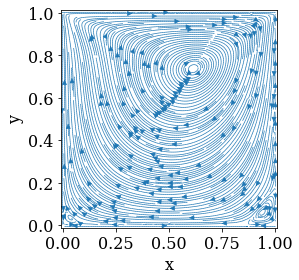

In [8]:
#Plot streamlines

#%matplotlib notebook 
streamlines = plt.streamplot(gridc.x, gridc.y, u_inter_center.transpose(), v_inter_center.transpose(), density = 3.8, linewidth=0.7 )
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.axis('scaled', adjustable='box')
plt.rc('font', family='serif', size=14)

In [9]:
#Define vorticity  
vorticity_1 = (-gridx.get_values('velc')[:,1:] + gridx.get_values('velc')[:,:-1]) / gridx.dx
vorticity_2 = (gridy.get_values('velc')[1:,:] - gridy.get_values('velc')[:-1,:]) / gridy.dx

vorticity = vorticity_1 + vorticity_2

<IPython.core.display.Javascript object>


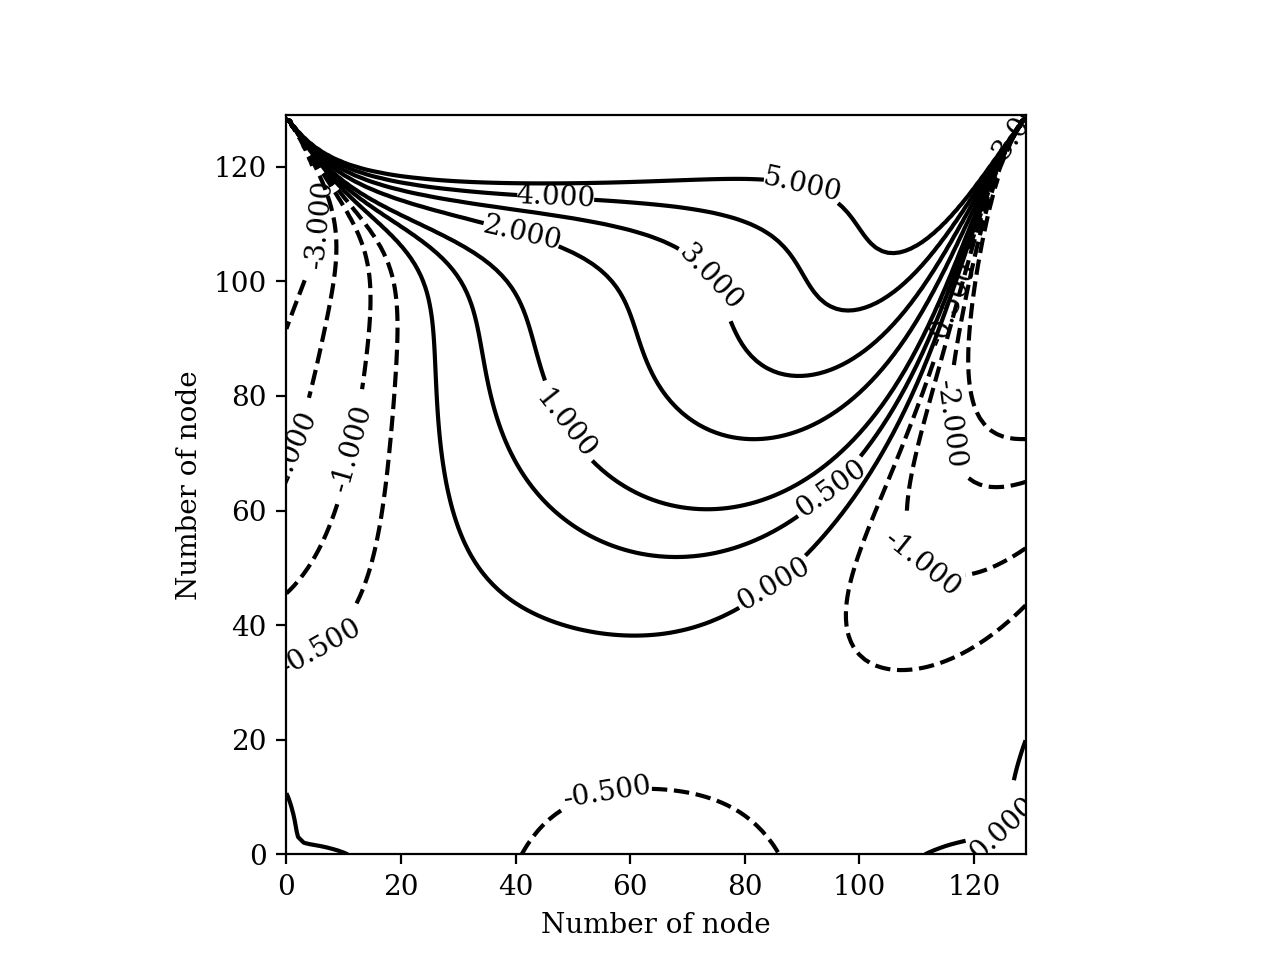

In [28]:
# #Plot vorticity

#%matplotlib notebook
contour = plt.contour(-vorticity.transpose(), colors = 'k', levels = [-3,-2,-1,-0.5,0,0.5,1,2,3,4,5])
plt.clabel(contour, inline=1, fontsize=10)
plt.axis('scaled')
plt.xlabel('Number of node')
plt.ylabel('Number of node')
plt.show()

In [12]:
#Compare with literature results

# Load files for velocity plots at the geometrical centre 
u_lit = numpy.loadtxt("Dataset_u_vel_P2.csv")[:,0]
y_lit = numpy.loadtxt("Dataset_u_vel_P2.csv")[:,1]

v_lit = numpy.loadtxt("Dataset _v_vel_P2.csv")[:,1]
x_lit = numpy.loadtxt("Dataset _v_vel_P2.csv")[:,0]

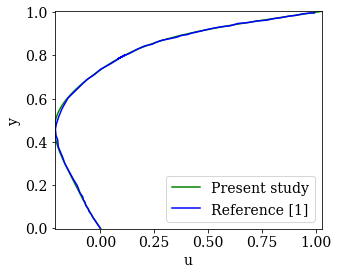

In [13]:
plt.plot(gridx.get_values('velc')[int(nx/2),:],gridy.x, 'g', label = 'Present study')
plt.plot(u_lit, y_lit, 'b', label = 'Reference [1]')
plt.xlabel('u')
plt.ylabel('y')
plt.axis('equal')
plt.axis('scaled', adjustable='box')
plt.rc('font', family='serif', size=14)
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.legend()

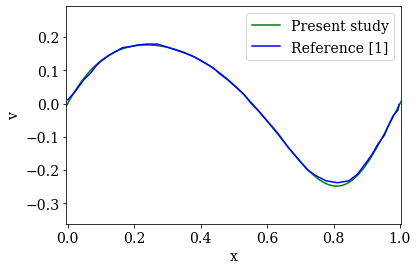

In [14]:
plt.plot(gridy.x,gridy.get_values('velc')[:,int(ny/2)], 'g',label = 'Present study')
plt.plot(x_lit, v_lit, 'b',label = 'Reference [1]')
plt.xlabel('x')
plt.ylabel('v')
plt.axis('equal')
plt.axis('scaled', adjustable='box')
plt.rc('font', family='serif', size=14)
plt.axis('equal')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.legend()